In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plot(img, color_map=cv.COLOR_BGR2RGB, axis=False, **kwargs):
    if not axis:
        plt.axis('off')
    plt.imshow(img if color_map is None else cv.cvtColor(img, color_map), **kwargs)
    plt.show()

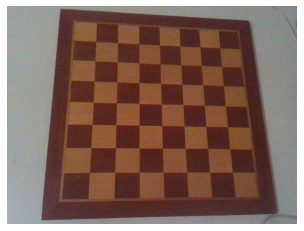

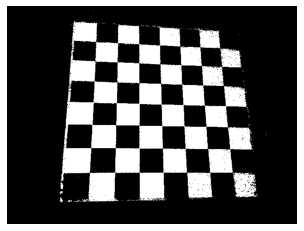

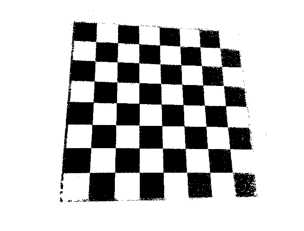

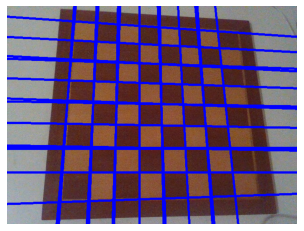

In [3]:
img = cv.imread('img/2021-12-05-022131.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plot(img)

lwr = np.array([0, 98, 116])
upr = np.array([179, 255, 255])

msk = cv.inRange(hsv, lwr, upr)
plot(msk)

krn = cv.getStructuringElement(cv.MORPH_RECT, (50, 30))
dlt = cv.dilate(msk, krn, iterations=10)
res = 255 - cv.bitwise_and(dlt, msk)
plot(res, None, cmap='gray')

edges = cv.Canny(res, 50, 200, None, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi / 180, 100, None, 0, 0)

for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000*(a)))
    cv.line(img, pt1, pt2, (255, 0, 0), 3)

plot(img)